# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

03:31:10 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=397468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=891794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=23773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=979576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

03:31:11 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=259086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=822117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

03:31:13 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=72941;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=767364;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#92\92]8;;\

03:31:14 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=624287;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=632533;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#92\92]8;;\

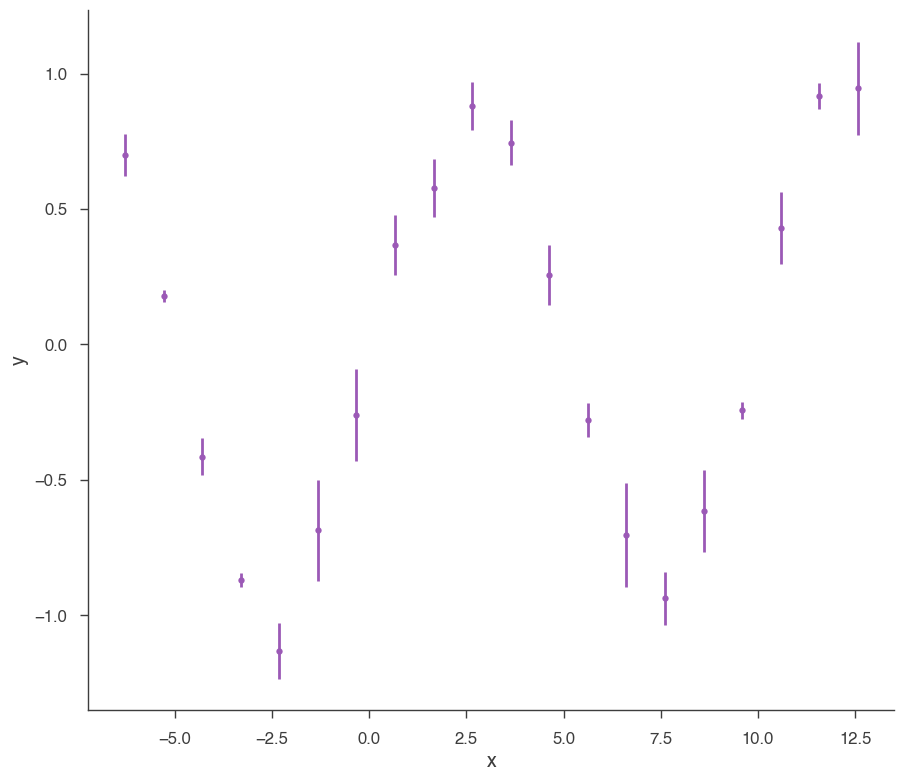

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=100449;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=90781;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

03:31:19 INFO      Mean acceptance fraction: 0.7043                                            ]8;id=568000;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=427411;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

03:31:20 INFO      fit restored to maximum of posterior                                         ]8;id=190216;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=224185;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=805603;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=959570;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.85 -0.24 +0.18) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.002 +/- 0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.249164
total,-9.249164


Values of statistical measures:

,statistical measures
AIC,23.204210
BIC,24.489793
DIC,22.918269
PDIC,2.189602


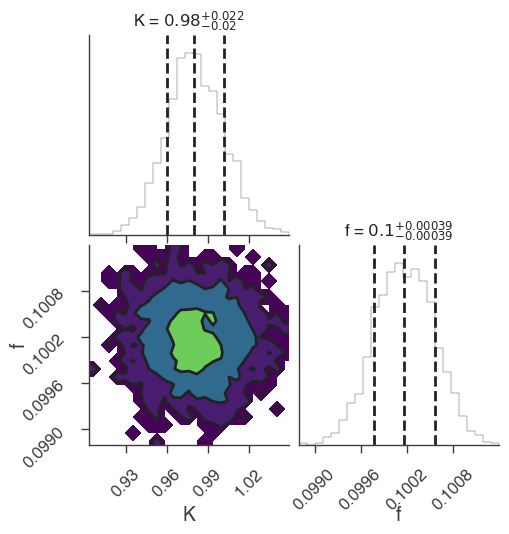

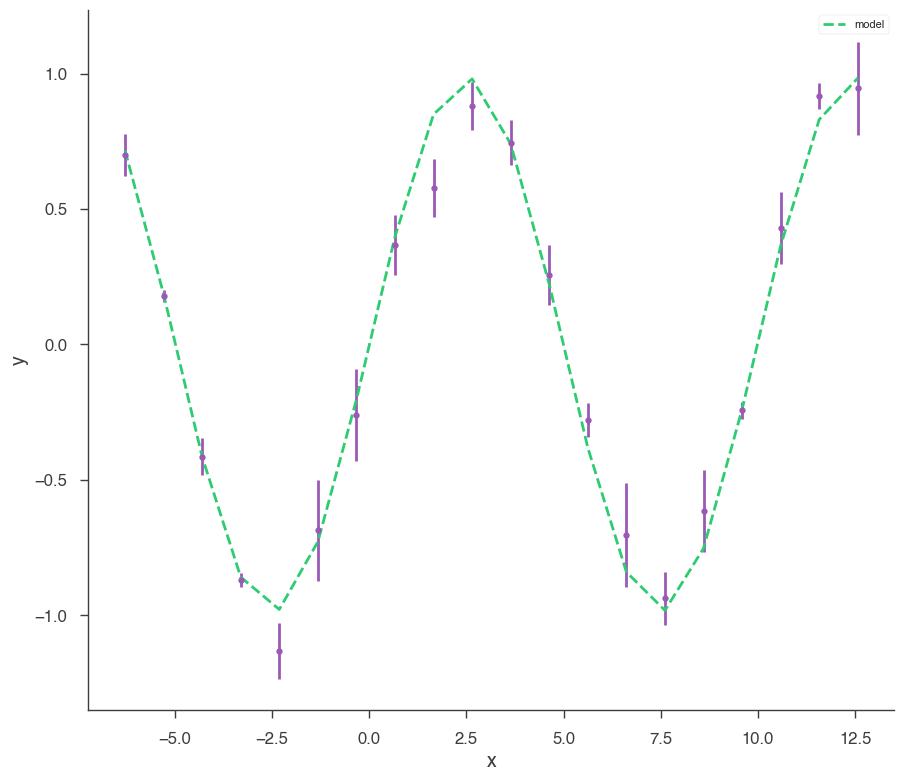

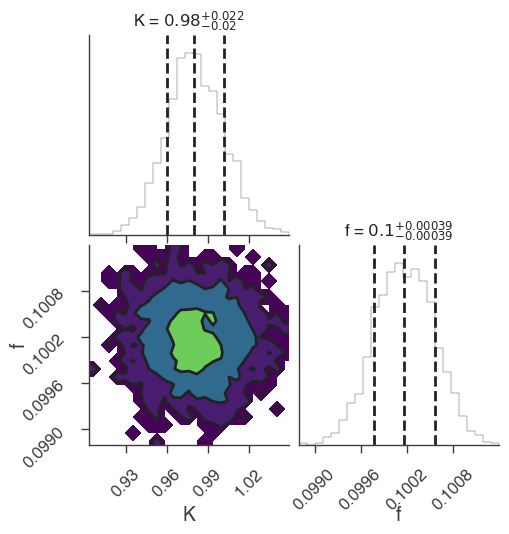

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

03:31:21 INFO      sampler set to multinest                                                ]8;id=181219;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=765247;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


 ln(ev)=  -18.576548468828030      +/-  0.14452881396190445     
 Total Likelihood Evaluations:         5619
  analysing data from chains/fit-.txt
 Sampling finished. Exiting MultiNest


03:31:22 INFO      fit restored to maximum of posterior                                         ]8;id=729045;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=698932;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=326584;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=842797;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.83 -0.22 +0.18) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0021 -0.0033 +0.0035) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.252841
total,-9.252841


Values of statistical measures:

,statistical measures
AIC,23.211565
BIC,24.497148
DIC,22.318475
PDIC,1.901800
log(Z),-8.067692


         INFO      deleting the chain directory chains                                     ]8;id=375963;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=998435;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

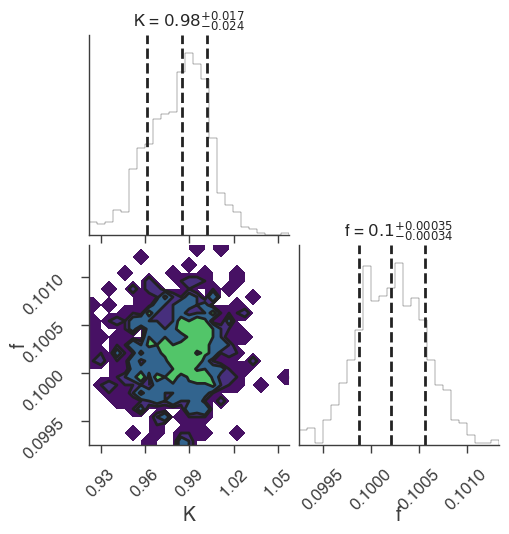

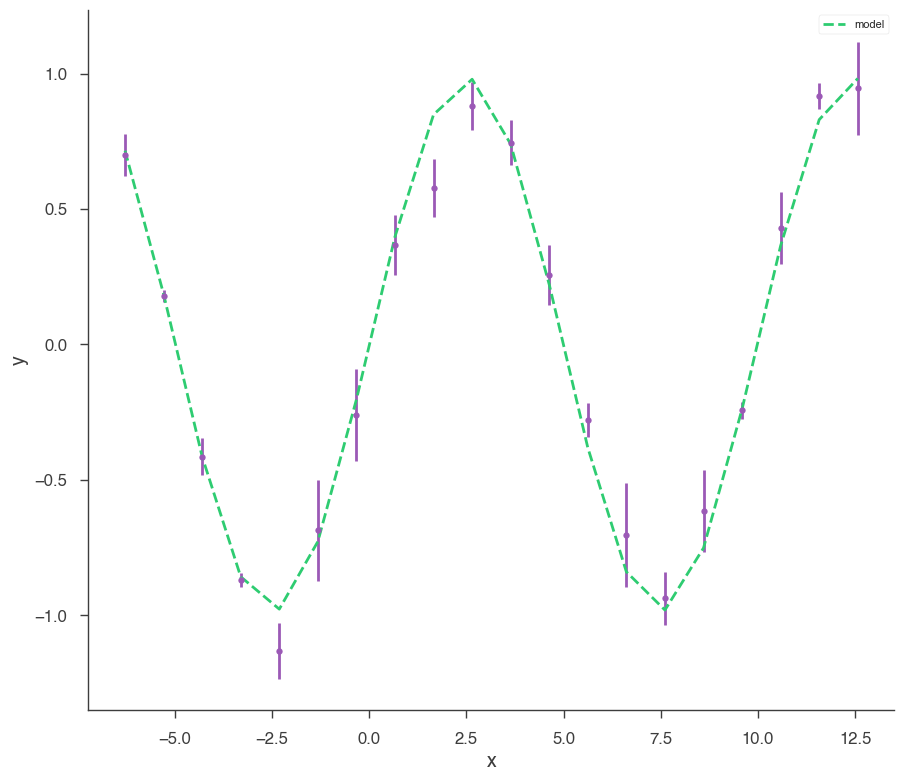

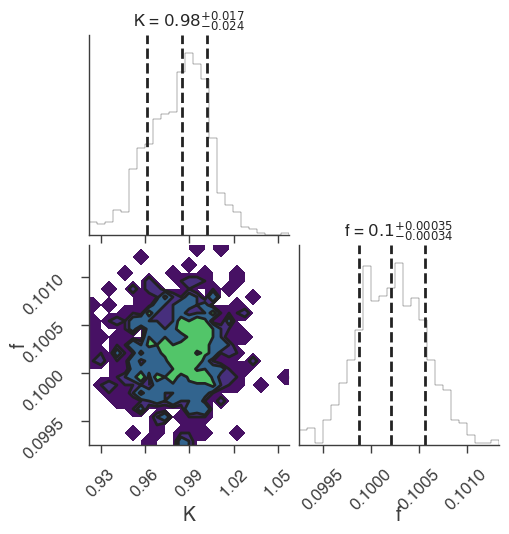

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

03:31:23 INFO      sampler set to dynesty_nested                                           ]8;id=121114;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=820742;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

125it [00:00, 1245.65it/s, bound: 0 | nc: 1 | ncall: 542 | eff(%): 23.063 | loglstar:   -inf < -3280.891 <    inf | logz: -3287.839 +/-  0.130 | dlogz: 3235.724 >  0.409]

250it [00:00, 1135.20it/s, bound: 0 | nc: 1 | ncall: 723 | eff(%): 34.578 | loglstar:   -inf < -2323.718 <    inf | logz: -2331.027 +/-  0.135 | dlogz: 2290.946 >  0.409]

365it [00:00, 1065.64it/s, bound: 0 | nc: 3 | ncall: 968 | eff(%): 37.707 | loglstar:   -inf < -1876.359 <    inf | logz: -1883.920 +/-  0.136 | dlogz: 1858.851 >  0.409]

473it [00:00, 980.06it/s, bound: 0 | nc: 1 | ncall: 1286 | eff(%): 36.781 | loglstar:   -inf < -1631.999 <    inf | logz: -1638.895 +/-  0.123 | dlogz: 1610.440 >  0.409]

572it [00:00, 814.03it/s, bound: 0 | nc: 3 | ncall: 1627 | eff(%): 35.157 | loglstar:   -inf < -1476.227 <    inf | logz: -1484.083 +/-  0.135 | dlogz: 1456.608 >  0.409]

657it [00:00, 667.73it/s, bound: 0 | nc: 13 | ncall: 2057 | eff(%): 31.940 | loglstar:   -inf < -1341.700 <    inf | logz: -1349.630 +/-  0.135 | dlogz: 1321.641 >  0.409]

729it [00:01, 547.85it/s, bound: 0 | nc: 6 | ncall: 2482 | eff(%): 29.371 | loglstar:   -inf < -1215.320 <    inf | logz: -1222.735 +/-  0.135 | dlogz: 1193.930 >  0.409] 

790it [00:01, 452.41it/s, bound: 0 | nc: 2 | ncall: 2940 | eff(%): 26.871 | loglstar:   -inf < -1124.770 <    inf | logz: -1132.599 +/-  0.132 | dlogz: 1103.944 >  0.409]

841it [00:01, 405.55it/s, bound: 0 | nc: 11 | ncall: 3324 | eff(%): 25.301 | loglstar:   -inf < -1083.989 <    inf | logz: -1091.672 +/-  0.130 | dlogz: 1062.710 >  0.409]

885it [00:01, 373.17it/s, bound: 0 | nc: 3 | ncall: 3652 | eff(%): 24.233 | loglstar:   -inf < -1024.247 <    inf | logz: -1032.314 +/-  0.136 | dlogz: 1016.911 >  0.409] 

925it [00:01, 358.83it/s, bound: 0 | nc: 19 | ncall: 3925 | eff(%): 23.567 | loglstar:   -inf < -949.820 <    inf | logz: -958.073 +/-  0.139 | dlogz: 942.842 >  0.409]  

962it [00:01, 306.73it/s, bound: 0 | nc: 8 | ncall: 4324 | eff(%): 22.248 | loglstar:   -inf < -893.765 <    inf | logz: -901.274 +/-  0.131 | dlogz: 889.158 >  0.409] 

994it [00:01, 280.69it/s, bound: 0 | nc: 20 | ncall: 4681 | eff(%): 21.235 | loglstar:   -inf < -840.107 <    inf | logz: -848.229 +/-  0.137 | dlogz: 836.473 >  0.409]

1023it [00:02, 276.95it/s, bound: 0 | nc: 1 | ncall: 4955 | eff(%): 20.646 | loglstar:   -inf < -795.703 <    inf | logz: -803.898 +/-  0.134 | dlogz: 791.838 >  0.409]

1052it [00:02, 259.10it/s, bound: 0 | nc: 6 | ncall: 5255 | eff(%): 20.019 | loglstar:   -inf < -755.618 <    inf | logz: -763.673 +/-  0.136 | dlogz: 751.585 >  0.409]

1079it [00:02, 253.07it/s, bound: 0 | nc: 20 | ncall: 5554 | eff(%): 19.427 | loglstar:   -inf < -727.148 <    inf | logz: -734.643 +/-  0.130 | dlogz: 722.122 >  0.409]

1105it [00:02, 239.07it/s, bound: 0 | nc: 1 | ncall: 5866 | eff(%): 18.837 | loglstar:   -inf < -703.466 <    inf | logz: -711.391 +/-  0.134 | dlogz: 698.904 >  0.409] 

1129it [00:02, 213.78it/s, bound: 0 | nc: 29 | ncall: 6262 | eff(%): 18.029 | loglstar:   -inf < -681.592 <    inf | logz: -690.363 +/-  0.141 | dlogz: 678.429 >  0.409]

1153it [00:02, 218.60it/s, bound: 0 | nc: 10 | ncall: 6540 | eff(%): 17.630 | loglstar:   -inf < -664.544 <    inf | logz: -672.561 +/-  0.135 | dlogz: 659.953 >  0.409]

1176it [00:02, 201.83it/s, bound: 0 | nc: 2 | ncall: 6874 | eff(%): 17.108 | loglstar:   -inf < -612.980 <    inf | logz: -622.275 +/-  0.148 | dlogz: 611.118 >  0.409] 

1197it [00:03, 164.40it/s, bound: 0 | nc: 21 | ncall: 7365 | eff(%): 16.253 | loglstar:   -inf < -554.354 <    inf | logz: -563.642 +/-  0.147 | dlogz: 552.156 >  0.409]

1215it [00:03, 162.76it/s, bound: 0 | nc: 22 | ncall: 7665 | eff(%): 15.851 | loglstar:   -inf < -520.406 <    inf | logz: -530.093 +/-  0.154 | dlogz: 520.674 >  0.409]

1232it [00:03, 148.69it/s, bound: 0 | nc: 7 | ncall: 8000 | eff(%): 15.400 | loglstar:   -inf < -497.534 <    inf | logz: -506.104 +/-  0.142 | dlogz: 493.517 >  0.409] 

1248it [00:03, 127.39it/s, bound: 0 | nc: 60 | ncall: 8419 | eff(%): 14.824 | loglstar:   -inf < -472.453 <    inf | logz: -481.564 +/-  0.142 | dlogz: 469.268 >  0.409]

1262it [00:03, 112.38it/s, bound: 0 | nc: 29 | ncall: 8805 | eff(%): 14.333 | loglstar:   -inf < -451.199 <    inf | logz: -460.520 +/-  0.148 | dlogz: 448.750 >  0.409]

1274it [00:03, 108.23it/s, bound: 0 | nc: 38 | ncall: 9096 | eff(%): 14.006 | loglstar:   -inf < -437.751 <    inf | logz: -446.751 +/-  0.146 | dlogz: 434.522 >  0.409]

1286it [00:03, 103.40it/s, bound: 0 | nc: 2 | ncall: 9400 | eff(%): 13.681 | loglstar:   -inf < -425.910 <    inf | logz: -435.601 +/-  0.151 | dlogz: 424.465 >  0.409] 

1297it [00:04, 100.30it/s, bound: 0 | nc: 6 | ncall: 9675 | eff(%): 13.406 | loglstar:   -inf < -405.716 <    inf | logz: -414.426 +/-  0.144 | dlogz: 401.857 >  0.409]

1308it [00:04, 93.39it/s, bound: 0 | nc: 3 | ncall: 10002 | eff(%): 13.077 | loglstar:   -inf < -387.104 <    inf | logz: -396.354 +/-  0.148 | dlogz: 384.255 >  0.409]

1318it [00:04, 85.25it/s, bound: 0 | nc: 15 | ncall: 10347 | eff(%): 12.738 | loglstar:   -inf < -376.944 <    inf | logz: -386.536 +/-  0.150 | dlogz: 374.847 >  0.409]

1332it [00:04, 97.06it/s, bound: 0 | nc: 13 | ncall: 10582 | eff(%): 12.587 | loglstar:   -inf < -360.863 <    inf | logz: -370.195 +/-  0.143 | dlogz: 357.641 >  0.409]

1343it [00:04, 99.39it/s, bound: 0 | nc: 2 | ncall: 10819 | eff(%): 12.413 | loglstar:   -inf < -350.304 <    inf | logz: -359.824 +/-  0.146 | dlogz: 347.469 >  0.409] 

1354it [00:04, 100.75it/s, bound: 0 | nc: 43 | ncall: 11059 | eff(%): 12.243 | loglstar:   -inf < -339.073 <    inf | logz: -348.360 +/-  0.145 | dlogz: 335.729 >  0.409]

1365it [00:04, 91.62it/s, bound: 0 | nc: 73 | ncall: 11400 | eff(%): 11.974 | loglstar:   -inf < -323.188 <    inf | logz: -333.109 +/-  0.153 | dlogz: 321.794 >  0.409] 

1376it [00:04, 90.94it/s, bound: 0 | nc: 55 | ncall: 11678 | eff(%): 11.783 | loglstar:   -inf < -314.469 <    inf | logz: -323.252 +/-  0.141 | dlogz: 310.198 >  0.409]

1387it [00:05, 90.62it/s, bound: 0 | nc: 77 | ncall: 11958 | eff(%): 11.599 | loglstar:   -inf < -307.597 <    inf | logz: -316.807 +/-  0.145 | dlogz: 304.060 >  0.409]

1397it [00:05, 73.22it/s, bound: 0 | nc: 149 | ncall: 12434 | eff(%): 11.235 | loglstar:   -inf < -303.739 <    inf | logz: -312.652 +/-  0.139 | dlogz: 300.069 >  0.409]

1410it [00:05, 84.18it/s, bound: 0 | nc: 42 | ncall: 12677 | eff(%): 11.123 | loglstar:   -inf < -293.285 <    inf | logz: -302.393 +/-  0.144 | dlogz: 290.017 >  0.409] 

1420it [00:05, 79.52it/s, bound: 0 | nc: 18 | ncall: 13009 | eff(%): 10.916 | loglstar:   -inf < -283.816 <    inf | logz: -292.653 +/-  0.146 | dlogz: 280.061 >  0.409]

1429it [00:05, 77.87it/s, bound: 0 | nc: 54 | ncall: 13284 | eff(%): 10.757 | loglstar:   -inf < -276.432 <    inf | logz: -285.238 +/-  0.145 | dlogz: 272.632 >  0.409]

1438it [00:05, 77.87it/s, bound: 0 | nc: 37 | ncall: 13549 | eff(%): 10.613 | loglstar:   -inf < -272.266 <    inf | logz: -281.145 +/-  0.141 | dlogz: 268.538 >  0.409]

1447it [00:05, 76.24it/s, bound: 0 | nc: 25 | ncall: 13832 | eff(%): 10.461 | loglstar:   -inf < -264.935 <    inf | logz: -274.408 +/-  0.146 | dlogz: 262.043 >  0.409]

1455it [00:05, 74.79it/s, bound: 0 | nc: 26 | ncall: 14087 | eff(%): 10.329 | loglstar:   -inf < -258.415 <    inf | logz: -267.557 +/-  0.144 | dlogz: 254.883 >  0.409]

1463it [00:06, 66.87it/s, bound: 0 | nc: 12 | ncall: 14443 | eff(%): 10.129 | loglstar:   -inf < -256.148 <    inf | logz: -264.140 +/-  0.137 | dlogz: 251.085 >  0.409]

1470it [00:06, 63.09it/s, bound: 0 | nc: 105 | ncall: 14733 | eff(%):  9.978 | loglstar:   -inf < -255.264 <    inf | logz: -262.936 +/-  0.133 | dlogz: 249.799 >  0.409]

1477it [00:06, 51.37it/s, bound: 1 | nc: 1 | ncall: 14741 | eff(%): 10.020 | loglstar:   -inf < -252.055 <    inf | logz: -260.609 +/-  0.139 | dlogz: 247.662 >  0.409]  

1595it [00:06, 296.85it/s, bound: 1 | nc: 2 | ncall: 14896 | eff(%): 10.708 | loglstar:   -inf < -196.198 <    inf | logz: -204.810 +/-  0.137 | dlogz: 191.457 >  0.409]

1696it [00:06, 465.09it/s, bound: 1 | nc: 3 | ncall: 15078 | eff(%): 11.248 | loglstar:   -inf < -159.177 <    inf | logz: -168.133 +/-  0.144 | dlogz: 154.898 >  0.409]

1795it [00:06, 595.07it/s, bound: 1 | nc: 5 | ncall: 15294 | eff(%): 11.737 | loglstar:   -inf < -133.662 <    inf | logz: -142.362 +/-  0.140 | dlogz: 128.739 >  0.409]

1865it [00:07, 459.60it/s, bound: 2 | nc: 1 | ncall: 15392 | eff(%): 12.117 | loglstar:   -inf < -114.656 <    inf | logz: -123.740 +/-  0.141 | dlogz: 109.982 >  0.409]

1970it [00:07, 587.10it/s, bound: 2 | nc: 2 | ncall: 15534 | eff(%): 12.682 | loglstar:   -inf < -91.600 <    inf | logz: -100.460 +/-  0.143 | dlogz: 86.379 >  0.409]  

2078it [00:07, 703.39it/s, bound: 2 | nc: 1 | ncall: 15701 | eff(%): 13.235 | loglstar:   -inf < -75.097 <    inf | logz: -84.386 +/-  0.144 | dlogz: 70.067 >  0.409] 

2161it [00:07, 707.01it/s, bound: 2 | nc: 2 | ncall: 15885 | eff(%): 13.604 | loglstar:   -inf < -61.082 <    inf | logz: -70.483 +/-  0.146 | dlogz: 55.926 >  0.409]

2241it [00:07, 525.09it/s, bound: 3 | nc: 2 | ncall: 16000 | eff(%): 14.006 | loglstar:   -inf < -52.491 <    inf | logz: -61.739 +/-  0.144 | dlogz: 46.943 >  0.409]

2346it [00:07, 634.06it/s, bound: 3 | nc: 2 | ncall: 16153 | eff(%): 14.524 | loglstar:   -inf < -42.832 <    inf | logz: -52.119 +/-  0.145 | dlogz: 37.047 >  0.409]

2450it [00:07, 725.21it/s, bound: 3 | nc: 4 | ncall: 16346 | eff(%): 14.988 | loglstar:   -inf < -34.959 <    inf | logz: -44.140 +/-  0.144 | dlogz: 28.782 >  0.409]

2535it [00:08, 520.11it/s, bound: 4 | nc: 1 | ncall: 16542 | eff(%): 15.325 | loglstar:   -inf < -29.351 <    inf | logz: -38.912 +/-  0.145 | dlogz: 23.351 >  0.409]

2644it [00:08, 630.99it/s, bound: 4 | nc: 1 | ncall: 16686 | eff(%): 15.846 | loglstar:   -inf < -24.859 <    inf | logz: -34.369 +/-  0.145 | dlogz: 18.520 >  0.409]

2741it [00:08, 703.95it/s, bound: 4 | nc: 3 | ncall: 16838 | eff(%): 16.279 | loglstar:   -inf < -21.711 <    inf | logz: -31.088 +/-  0.144 | dlogz: 14.983 >  0.409]

2827it [00:08, 720.94it/s, bound: 4 | nc: 1 | ncall: 17012 | eff(%): 16.618 | loglstar:   -inf < -19.338 <    inf | logz: -28.730 +/-  0.145 | dlogz: 12.405 >  0.409]

2910it [00:08, 539.65it/s, bound: 5 | nc: 1 | ncall: 17168 | eff(%): 16.950 | loglstar:   -inf < -17.525 <    inf | logz: -26.803 +/-  0.145 | dlogz: 10.267 >  0.409]

3043it [00:08, 700.47it/s, bound: 5 | nc: 1 | ncall: 17349 | eff(%): 17.540 | loglstar:   -inf < -15.069 <    inf | logz: -24.517 +/-  0.144 | dlogz:  7.647 >  0.409]

3143it [00:08, 766.48it/s, bound: 5 | nc: 2 | ncall: 17524 | eff(%): 17.935 | loglstar:   -inf < -13.772 <    inf | logz: -23.143 +/-  0.145 | dlogz:  6.021 >  0.409]

3234it [00:09, 560.77it/s, bound: 6 | nc: 1 | ncall: 17737 | eff(%): 18.233 | loglstar:   -inf < -12.892 <    inf | logz: -22.226 +/-  0.145 | dlogz:  4.879 >  0.409]

3360it [00:09, 696.57it/s, bound: 6 | nc: 2 | ncall: 17929 | eff(%): 18.741 | loglstar:   -inf < -11.875 <    inf | logz: -21.258 +/-  0.144 | dlogz:  3.628 >  0.409]

3449it [00:09, 738.00it/s, bound: 6 | nc: 1 | ncall: 18090 | eff(%): 19.066 | loglstar:   -inf < -11.333 <    inf | logz: -20.716 +/-  0.145 | dlogz:  2.901 >  0.409]

3538it [00:09, 753.87it/s, bound: 6 | nc: 2 | ncall: 18287 | eff(%): 19.347 | loglstar:   -inf < -10.895 <    inf | logz: -20.288 +/-  0.145 | dlogz:  2.299 >  0.409]

3625it [00:09, 567.85it/s, bound: 7 | nc: 1 | ncall: 18412 | eff(%): 19.688 | loglstar:   -inf < -10.644 <    inf | logz: -19.962 +/-  0.145 | dlogz:  1.825 >  0.409]

3727it [00:09, 659.07it/s, bound: 7 | nc: 2 | ncall: 18560 | eff(%): 20.081 | loglstar:   -inf < -10.308 <    inf | logz: -19.663 +/-  0.144 | dlogz:  1.385 >  0.409]

3817it [00:09, 711.59it/s, bound: 7 | nc: 4 | ncall: 18733 | eff(%): 20.376 | loglstar:   -inf < -10.077 <    inf | logz: -19.452 +/-  0.144 | dlogz:  1.077 >  0.409]

3900it [00:10, 496.92it/s, bound: 8 | nc: 1 | ncall: 18936 | eff(%): 20.596 | loglstar:   -inf < -9.903 <    inf | logz: -19.290 +/-  0.145 | dlogz:  0.849 >  0.409] 

4028it [00:10, 644.65it/s, bound: 8 | nc: 3 | ncall: 19107 | eff(%): 21.081 | loglstar:   -inf < -9.737 <    inf | logz: -19.100 +/-  0.145 | dlogz:  0.590 >  0.409]

4117it [00:10, 694.53it/s, bound: 8 | nc: 4 | ncall: 19263 | eff(%): 21.373 | loglstar:   -inf < -9.640 <    inf | logz: -19.000 +/-  0.145 | dlogz:  0.459 >  0.409]

4158it [00:10, 395.05it/s, +400 | bound: 8 | nc: 1 | ncall: 19759 | eff(%): 23.545 | loglstar:   -inf < -9.265 <    inf | logz: -18.604 +/-  0.144 | dlogz:  0.001 >  0.409]

03:31:34 INFO      fit restored to maximum of posterior                                         ]8;id=352982;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=315935;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=882454;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=652286;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.84 -0.21 +0.19) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0020 -0.0034 +0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.249378
total,-9.249378


Values of statistical measures:

,statistical measures
AIC,23.204638
BIC,24.490220
DIC,22.390458
PDIC,1.943593
log(Z),-8.079480


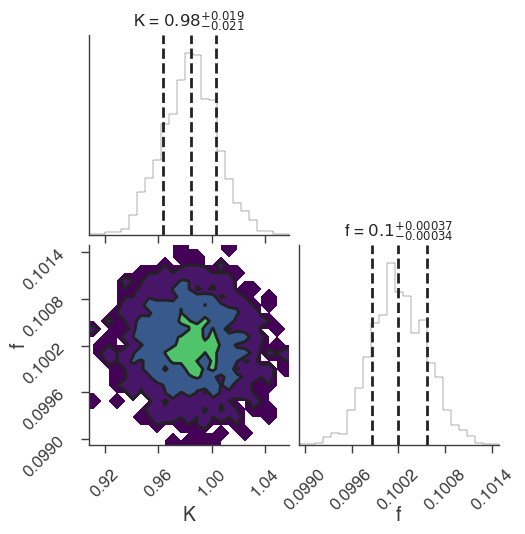

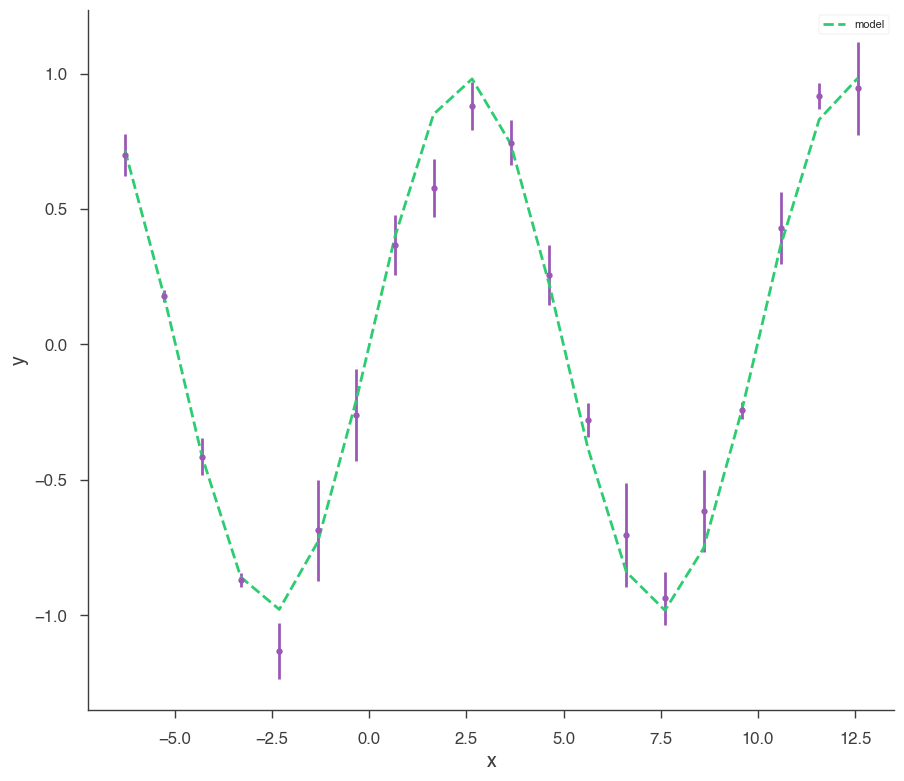

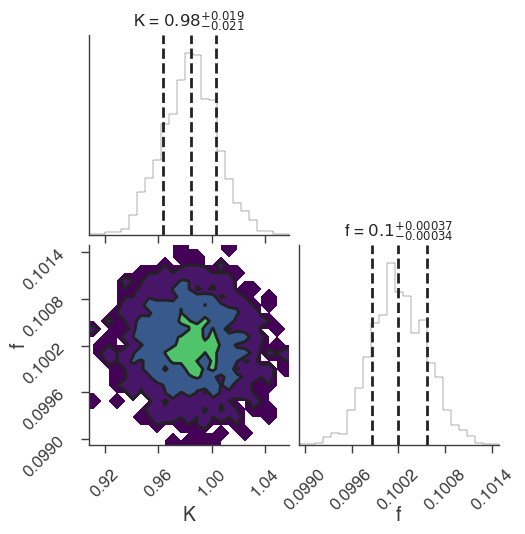

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

03:31:35 INFO      sampler set to dynesty_dynamic                                          ]8;id=737124;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=693720;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

62it [00:00, 619.76it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 65 | eff(%): 10.973 | loglstar:   -inf < -3975.409 <    inf | logz: -3982.440 +/-  0.119 | dlogz: 3980.956 >  0.010]

205it [00:00, 1095.12it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 240 | eff(%): 27.703 | loglstar:   -inf < -2649.423 <    inf | logz: -2656.601 +/-  0.117 | dlogz: 2644.634 >  0.010]

315it [00:00, 1091.59it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 414 | eff(%): 34.464 | loglstar:   -inf < -2156.843 <    inf | logz: -2164.186 +/-  0.118 | dlogz: 2154.459 >  0.010]

425it [00:00, 985.60it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 640 | eff(%): 37.281 | loglstar:   -inf < -1818.757 <    inf | logz: -1826.432 +/-  0.122 | dlogz: 1817.193 >  0.010] 

525it [00:00, 963.11it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 900 | eff(%): 37.500 | loglstar:   -inf < -1625.084 <    inf | logz: -1631.979 +/-  0.109 | dlogz: 1620.006 >  0.010]

623it [00:00, 836.04it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1235 | eff(%): 35.908 | loglstar:   -inf < -1482.403 <    inf | logz: -1490.458 +/-  0.125 | dlogz: 1480.750 >  0.010]

710it [00:00, 749.95it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1577 | eff(%): 34.184 | loglstar:   -inf < -1374.136 <    inf | logz: -1381.901 +/-  0.121 | dlogz: 1370.498 >  0.010]

788it [00:00, 653.60it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 1940 | eff(%): 32.295 | loglstar:   -inf < -1293.145 <    inf | logz: -1300.882 +/-  0.117 | dlogz: 1288.828 >  0.010]

857it [00:01, 537.59it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 2343 | eff(%): 30.144 | loglstar:   -inf < -1220.517 <    inf | logz: -1228.105 +/-  0.119 | dlogz: 1215.739 >  0.010]

916it [00:01, 460.68it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 2752 | eff(%): 28.167 | loglstar:   -inf < -1142.067 <    inf | logz: -1150.071 +/-  0.124 | dlogz: 1138.057 >  0.010]

966it [00:01, 426.17it/s, batch: 0 | bound: 0 | nc: 19 | ncall: 3097 | eff(%): 26.856 | loglstar:   -inf < -1085.391 <    inf | logz: -1093.014 +/-  0.118 | dlogz: 1080.179 >  0.010]

1011it [00:01, 377.23it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 3453 | eff(%): 25.576 | loglstar:   -inf < -1025.198 <    inf | logz: -1033.601 +/-  0.124 | dlogz: 1021.525 >  0.010]

1051it [00:01, 329.21it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 3840 | eff(%): 24.217 | loglstar:   -inf < -956.465 <    inf | logz: -965.329 +/-  0.130 | dlogz: 954.095 >  0.010]   

1086it [00:02, 290.41it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 4275 | eff(%): 22.743 | loglstar:   -inf < -919.977 <    inf | logz: -928.138 +/-  0.119 | dlogz: 915.213 >  0.010]

1117it [00:02, 275.25it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 4560 | eff(%): 22.075 | loglstar:   -inf < -878.655 <    inf | logz: -886.419 +/-  0.114 | dlogz: 873.065 >  0.010]

1146it [00:02, 236.98it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 4972 | eff(%): 20.943 | loglstar:   -inf < -847.197 <    inf | logz: -855.065 +/-  0.118 | dlogz: 841.741 >  0.010] 

1171it [00:02, 219.90it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 5305 | eff(%): 20.172 | loglstar:   -inf < -821.508 <    inf | logz: -829.031 +/-  0.120 | dlogz: 815.560 >  0.010]

1197it [00:02, 228.28it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 5601 | eff(%): 19.620 | loglstar:   -inf < -793.532 <    inf | logz: -801.880 +/-  0.124 | dlogz: 788.798 >  0.010]

1221it [00:02, 202.54it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 5957 | eff(%): 18.910 | loglstar:   -inf < -770.833 <    inf | logz: -778.654 +/-  0.119 | dlogz: 765.231 >  0.010]

1242it [00:02, 190.79it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 6244 | eff(%): 18.416 | loglstar:   -inf < -756.497 <    inf | logz: -764.875 +/-  0.119 | dlogz: 751.474 >  0.010]

1262it [00:03, 188.26it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 6476 | eff(%): 18.091 | loglstar:   -inf < -731.403 <    inf | logz: -739.943 +/-  0.125 | dlogz: 726.728 >  0.010]

1282it [00:03, 165.30it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 6916 | eff(%): 17.287 | loglstar:   -inf < -711.289 <    inf | logz: -720.069 +/-  0.127 | dlogz: 707.184 >  0.010] 

1301it [00:03, 170.33it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 7143 | eff(%): 17.022 | loglstar:   -inf < -697.219 <    inf | logz: -705.198 +/-  0.121 | dlogz: 691.575 >  0.010]

1328it [00:03, 190.12it/s, batch: 0 | bound: 0 | nc: 23 | ncall: 7379 | eff(%): 16.855 | loglstar:   -inf < -682.727 <    inf | logz: -691.118 +/-  0.123 | dlogz: 677.697 >  0.010]

1348it [00:03, 175.69it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 7676 | eff(%): 16.487 | loglstar:   -inf < -670.752 <    inf | logz: -679.680 +/-  0.125 | dlogz: 666.421 >  0.010] 

1367it [00:03, 164.92it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 7981 | eff(%): 16.118 | loglstar:   -inf < -657.258 <    inf | logz: -666.684 +/-  0.133 | dlogz: 654.583 >  0.010]

1384it [00:03, 135.66it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 8416 | eff(%): 15.523 | loglstar:   -inf < -621.645 <    inf | logz: -630.307 +/-  0.130 | dlogz: 617.151 >  0.010]

1399it [00:03, 135.72it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 8665 | eff(%): 15.265 | loglstar:   -inf < -592.825 <    inf | logz: -602.107 +/-  0.130 | dlogz: 589.058 >  0.010] 

1415it [00:04, 140.16it/s, batch: 0 | bound: 0 | nc: 38 | ncall: 8895 | eff(%): 15.061 | loglstar:   -inf < -560.602 <    inf | logz: -569.203 +/-  0.128 | dlogz: 555.746 >  0.010]

1430it [00:04, 137.06it/s, batch: 0 | bound: 0 | nc: 16 | ncall: 9229 | eff(%): 14.698 | loglstar:   -inf < -543.677 <    inf | logz: -552.235 +/-  0.128 | dlogz: 538.765 >  0.010]

1445it [00:04, 137.52it/s, batch: 0 | bound: 0 | nc: 31 | ncall: 9472 | eff(%): 14.491 | loglstar:   -inf < -520.208 <    inf | logz: -529.035 +/-  0.130 | dlogz: 515.697 >  0.010]

1460it [00:04, 124.18it/s, batch: 0 | bound: 0 | nc: 34 | ncall: 9812 | eff(%): 14.158 | loglstar:   -inf < -499.001 <    inf | logz: -508.574 +/-  0.135 | dlogz: 496.293 >  0.010]

1473it [00:04, 103.30it/s, batch: 0 | bound: 0 | nc: 41 | ncall: 10247 | eff(%): 13.706 | loglstar:   -inf < -481.198 <    inf | logz: -490.486 +/-  0.131 | dlogz: 477.398 >  0.010]

1485it [00:04, 103.73it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 10500 | eff(%): 13.500 | loglstar:   -inf < -467.581 <    inf | logz: -477.279 +/-  0.135 | dlogz: 464.951 >  0.010] 

1498it [00:04, 109.78it/s, batch: 0 | bound: 0 | nc: 18 | ncall: 10726 | eff(%): 13.344 | loglstar:   -inf < -450.551 <    inf | logz: -459.452 +/-  0.132 | dlogz: 446.054 >  0.010]

1510it [00:04, 101.67it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 11037 | eff(%): 13.088 | loglstar:   -inf < -433.768 <    inf | logz: -443.378 +/-  0.134 | dlogz: 430.736 >  0.010] 

1523it [00:05, 107.59it/s, batch: 0 | bound: 0 | nc: 25 | ncall: 11260 | eff(%): 12.951 | loglstar:   -inf < -423.289 <    inf | logz: -431.945 +/-  0.125 | dlogz: 418.019 >  0.010]

1535it [00:05, 94.60it/s, batch: 0 | bound: 0 | nc: 20 | ncall: 11641 | eff(%): 12.643 | loglstar:   -inf < -410.056 <    inf | logz: -419.815 +/-  0.136 | dlogz: 407.391 >  0.010] 

1545it [00:05, 92.88it/s, batch: 0 | bound: 0 | nc: 29 | ncall: 11891 | eff(%): 12.469 | loglstar:   -inf < -399.681 <    inf | logz: -408.980 +/-  0.129 | dlogz: 395.350 >  0.010]

1560it [00:05, 104.01it/s, batch: 0 | bound: 0 | nc: 30 | ncall: 12131 | eff(%): 12.351 | loglstar:   -inf < -386.376 <    inf | logz: -395.414 +/-  0.129 | dlogz: 381.732 >  0.010]

1571it [00:05, 103.20it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 12377 | eff(%): 12.200 | loglstar:   -inf < -377.340 <    inf | logz: -386.469 +/-  0.127 | dlogz: 372.529 >  0.010] 

1582it [00:05, 93.10it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 12712 | eff(%): 11.974 | loglstar:   -inf < -366.181 <    inf | logz: -375.777 +/-  0.130 | dlogz: 362.215 >  0.010] 

1592it [00:05, 92.85it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 12959 | eff(%): 11.829 | loglstar:   -inf < -358.825 <    inf | logz: -367.550 +/-  0.127 | dlogz: 353.506 >  0.010]

1602it [00:05, 93.38it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 13196 | eff(%): 11.697 | loglstar:   -inf < -350.321 <    inf | logz: -359.368 +/-  0.129 | dlogz: 346.350 >  0.010]

1613it [00:06, 97.54it/s, batch: 0 | bound: 0 | nc: 18 | ncall: 13422 | eff(%): 11.586 | loglstar:   -inf < -340.122 <    inf | logz: -348.954 +/-  0.128 | dlogz: 335.646 >  0.010]

1623it [00:06, 88.53it/s, batch: 0 | bound: 0 | nc: 40 | ncall: 13736 | eff(%): 11.401 | loglstar:   -inf < -332.858 <    inf | logz: -342.587 +/-  0.132 | dlogz: 330.003 >  0.010]

1633it [00:06, 73.66it/s, batch: 0 | bound: 0 | nc: 56 | ncall: 14182 | eff(%): 11.122 | loglstar:   -inf < -323.931 <    inf | logz: -333.579 +/-  0.131 | dlogz: 320.728 >  0.010]

1641it [00:06, 69.35it/s, batch: 0 | bound: 0 | nc: 71 | ncall: 14493 | eff(%): 10.945 | loglstar:   -inf < -321.059 <    inf | logz: -329.425 +/-  0.124 | dlogz: 315.874 >  0.010]

1651it [00:06, 75.22it/s, batch: 0 | bound: 0 | nc: 23 | ncall: 14738 | eff(%): 10.835 | loglstar:   -inf < -315.457 <    inf | logz: -324.491 +/-  0.126 | dlogz: 311.146 >  0.010]

1662it [00:06, 82.14it/s, batch: 0 | bound: 0 | nc: 39 | ncall: 14980 | eff(%): 10.736 | loglstar:   -inf < -311.539 <    inf | logz: -320.052 +/-  0.122 | dlogz: 306.428 >  0.010]

1671it [00:06, 78.92it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 15305 | eff(%): 10.573 | loglstar:   -inf < -305.142 <    inf | logz: -314.923 +/-  0.132 | dlogz: 302.114 >  0.010] 

1680it [00:06, 80.98it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 15549 | eff(%): 10.468 | loglstar:   -inf < -300.790 <    inf | logz: -309.609 +/-  0.126 | dlogz: 296.120 >  0.010]

1689it [00:07, 78.79it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 15828 | eff(%): 10.344 | loglstar:   -inf < -294.150 <    inf | logz: -302.850 +/-  0.127 | dlogz: 289.251 >  0.010]

1698it [00:07, 79.58it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 16079 | eff(%): 10.242 | loglstar:   -inf < -289.811 <    inf | logz: -299.054 +/-  0.128 | dlogz: 285.719 >  0.010]

1707it [00:07, 81.28it/s, batch: 0 | bound: 0 | nc: 68 | ncall: 16320 | eff(%): 10.149 | loglstar:   -inf < -286.525 <    inf | logz: -294.940 +/-  0.125 | dlogz: 281.222 >  0.010]

1716it [00:07, 48.96it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 16647 | eff(%): 10.008 | loglstar:   -inf < -282.000 <    inf | logz: -291.050 +/-  0.128 | dlogz: 277.623 >  0.010] 

1828it [00:07, 248.80it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 16785 | eff(%): 10.576 | loglstar:   -inf < -226.552 <    inf | logz: -235.454 +/-  0.125 | dlogz: 221.528 >  0.010]

1922it [00:07, 393.98it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 16936 | eff(%): 11.023 | loglstar:   -inf < -196.843 <    inf | logz: -205.738 +/-  0.129 | dlogz: 191.592 >  0.010]

2004it [00:07, 490.80it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 17091 | eff(%): 11.392 | loglstar:   -inf < -172.585 <    inf | logz: -181.218 +/-  0.124 | dlogz: 166.756 >  0.010]

2095it [00:08, 593.55it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 17299 | eff(%): 11.770 | loglstar:   -inf < -147.238 <    inf | logz: -155.929 +/-  0.124 | dlogz: 141.530 >  0.010]

2166it [00:08, 410.19it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 17436 | eff(%): 12.076 | loglstar:   -inf < -129.774 <    inf | logz: -138.765 +/-  0.127 | dlogz: 124.237 >  0.010]

2266it [00:08, 525.83it/s, batch: 0 | bound: 2 | nc: 4 | ncall: 17578 | eff(%): 12.535 | loglstar:   -inf < -109.523 <    inf | logz: -118.492 +/-  0.126 | dlogz: 103.799 >  0.010]

2364it [00:08, 625.28it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 17721 | eff(%): 12.974 | loglstar:   -inf < -92.944 <    inf | logz: -102.231 +/-  0.127 | dlogz: 87.377 >  0.010]  

2458it [00:08, 699.67it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 17897 | eff(%): 13.361 | loglstar:   -inf < -77.328 <    inf | logz: -86.520 +/-  0.128 | dlogz: 71.428 >  0.010] 

2541it [00:08, 721.58it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 18106 | eff(%): 13.657 | loglstar:   -inf < -66.908 <    inf | logz: -75.703 +/-  0.125 | dlogz: 61.101 >  0.010]

2623it [00:09, 510.98it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 18231 | eff(%): 14.004 | loglstar:   -inf < -58.314 <    inf | logz: -67.209 +/-  0.128 | dlogz: 52.766 >  0.010]

2742it [00:09, 649.80it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 18393 | eff(%): 14.513 | loglstar:   -inf < -49.340 <    inf | logz: -58.150 +/-  0.127 | dlogz: 43.445 >  0.010]

2842it [00:09, 727.91it/s, batch: 0 | bound: 3 | nc: 3 | ncall: 18568 | eff(%): 14.905 | loglstar:   -inf < -41.509 <    inf | logz: -51.046 +/-  0.130 | dlogz: 36.184 >  0.010]

2930it [00:09, 763.49it/s, batch: 0 | bound: 3 | nc: 3 | ncall: 18742 | eff(%): 15.227 | loglstar:   -inf < -35.902 <    inf | logz: -45.249 +/-  0.128 | dlogz: 30.182 >  0.010]

3018it [00:09, 501.04it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 18915 | eff(%): 15.545 | loglstar:   -inf < -31.849 <    inf | logz: -40.944 +/-  0.127 | dlogz: 25.677 >  0.010]

3135it [00:09, 627.08it/s, batch: 0 | bound: 4 | nc: 4 | ncall: 19049 | eff(%): 16.037 | loglstar:   -inf < -27.312 <    inf | logz: -36.459 +/-  0.127 | dlogz: 20.951 >  0.010]

3236it [00:09, 706.59it/s, batch: 0 | bound: 4 | nc: 3 | ncall: 19195 | eff(%): 16.431 | loglstar:   -inf < -23.841 <    inf | logz: -33.207 +/-  0.128 | dlogz: 17.497 >  0.010]

3325it [00:09, 727.59it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19376 | eff(%): 16.729 | loglstar:   -inf < -21.315 <    inf | logz: -30.470 +/-  0.128 | dlogz: 14.571 >  0.010]

3417it [00:10, 773.55it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 19567 | eff(%): 17.028 | loglstar:   -inf < -19.313 <    inf | logz: -28.527 +/-  0.127 | dlogz: 12.441 >  0.010]

3505it [00:10, 535.28it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 19713 | eff(%): 17.340 | loglstar:   -inf < -17.737 <    inf | logz: -26.833 +/-  0.128 | dlogz: 10.566 >  0.010]

3622it [00:10, 660.16it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 19865 | eff(%): 17.785 | loglstar:   -inf < -16.091 <    inf | logz: -25.168 +/-  0.127 | dlogz:  8.663 >  0.010]

3723it [00:10, 736.15it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20010 | eff(%): 18.152 | loglstar:   -inf < -15.185 <    inf | logz: -24.091 +/-  0.127 | dlogz:  7.382 >  0.010]

3812it [00:10, 757.70it/s, batch: 0 | bound: 5 | nc: 4 | ncall: 20179 | eff(%): 18.434 | loglstar:   -inf < -14.244 <    inf | logz: -23.308 +/-  0.127 | dlogz:  6.421 >  0.010]

3899it [00:10, 731.03it/s, batch: 0 | bound: 5 | nc: 3 | ncall: 20393 | eff(%): 18.662 | loglstar:   -inf < -13.437 <    inf | logz: -22.607 +/-  0.127 | dlogz:  5.548 >  0.010]

3980it [00:11, 495.51it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 20496 | eff(%): 18.956 | loglstar:   -inf < -12.841 <    inf | logz: -22.015 +/-  0.127 | dlogz:  4.798 >  0.010]

4084it [00:11, 597.26it/s, batch: 0 | bound: 6 | nc: 4 | ncall: 20636 | eff(%): 19.322 | loglstar:   -inf < -12.137 <    inf | logz: -21.354 +/-  0.128 | dlogz:  3.939 >  0.010]

4196it [00:11, 707.80it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 20827 | eff(%): 19.675 | loglstar:   -inf < -11.551 <    inf | logz: -20.770 +/-  0.128 | dlogz:  3.154 >  0.010]

4283it [00:11, 722.54it/s, batch: 0 | bound: 6 | nc: 3 | ncall: 20998 | eff(%): 19.923 | loglstar:   -inf < -11.206 <    inf | logz: -20.405 +/-  0.128 | dlogz:  2.645 >  0.010]

4367it [00:11, 472.11it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21182 | eff(%): 20.141 | loglstar:   -inf < -10.929 <    inf | logz: -20.114 +/-  0.128 | dlogz:  2.240 >  0.010]

4478it [00:11, 586.40it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21330 | eff(%): 20.513 | loglstar:   -inf < -10.606 <    inf | logz: -19.798 +/-  0.128 | dlogz:  1.775 >  0.010]

4581it [00:11, 676.43it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21504 | eff(%): 20.819 | loglstar:   -inf < -10.350 <    inf | logz: -19.562 +/-  0.128 | dlogz:  1.423 >  0.010]

4668it [00:12, 695.04it/s, batch: 0 | bound: 7 | nc: 4 | ncall: 21689 | eff(%): 21.037 | loglstar:   -inf < -10.177 <    inf | logz: -19.392 +/-  0.128 | dlogz:  1.173 >  0.010]

4751it [00:12, 694.79it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21905 | eff(%): 21.205 | loglstar:   -inf < -10.047 <    inf | logz: -19.255 +/-  0.128 | dlogz:  0.974 >  0.010]

4830it [00:12, 508.88it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22002 | eff(%): 21.465 | loglstar:   -inf < -9.936 <    inf | logz: -19.145 +/-  0.128 | dlogz:  0.816 >  0.010] 

4933it [00:12, 611.81it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22151 | eff(%): 21.778 | loglstar:   -inf < -9.791 <    inf | logz: -19.024 +/-  0.128 | dlogz:  0.646 >  0.010]

5016it [00:12, 659.93it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 22306 | eff(%): 21.994 | loglstar:   -inf < -9.726 <    inf | logz: -18.942 +/-  0.128 | dlogz:  0.536 >  0.010]

5098it [00:12, 697.18it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 22467 | eff(%): 22.197 | loglstar:   -inf < -9.667 <    inf | logz: -18.875 +/-  0.128 | dlogz:  0.447 >  0.010]

5177it [00:13, 456.74it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 22672 | eff(%): 22.342 | loglstar:   -inf < -9.600 <    inf | logz: -18.820 +/-  0.128 | dlogz:  0.375 >  0.010]

5289it [00:13, 580.86it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 22810 | eff(%): 22.690 | loglstar:   -inf < -9.538 <    inf | logz: -18.755 +/-  0.128 | dlogz:  0.294 >  0.010]

5386it [00:13, 661.75it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 22962 | eff(%): 22.956 | loglstar:   -inf < -9.490 <    inf | logz: -18.709 +/-  0.128 | dlogz:  0.238 >  0.010]

5471it [00:13, 704.83it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23112 | eff(%): 23.170 | loglstar:   -inf < -9.455 <    inf | logz: -18.676 +/-  0.128 | dlogz:  0.198 >  0.010]

5563it [00:13, 752.46it/s, batch: 0 | bound: 9 | nc: 9 | ncall: 23310 | eff(%): 23.364 | loglstar:   -inf < -9.420 <    inf | logz: -18.645 +/-  0.128 | dlogz:  0.163 >  0.010]

5649it [00:13, 513.84it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23471 | eff(%): 23.566 | loglstar:   -inf < -9.392 <    inf | logz: -18.621 +/-  0.128 | dlogz:  0.136 >  0.010]

5758it [00:13, 626.73it/s, batch: 0 | bound: 10 | nc: 3 | ncall: 23622 | eff(%): 23.870 | loglstar:   -inf < -9.369 <    inf | logz: -18.596 +/-  0.128 | dlogz:  0.108 >  0.010]

5844it [00:14, 677.64it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23769 | eff(%): 24.080 | loglstar:   -inf < -9.352 <    inf | logz: -18.580 +/-  0.128 | dlogz:  0.090 >  0.010]

5938it [00:14, 738.87it/s, batch: 0 | bound: 10 | nc: 4 | ncall: 23941 | eff(%): 24.295 | loglstar:   -inf < -9.338 <    inf | logz: -18.565 +/-  0.128 | dlogz:  0.074 >  0.010]

6024it [00:14, 744.21it/s, batch: 0 | bound: 10 | nc: 4 | ncall: 24135 | eff(%): 24.453 | loglstar:   -inf < -9.326 <    inf | logz: -18.554 +/-  0.128 | dlogz:  0.062 >  0.010]

6107it [00:14, 509.79it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 24249 | eff(%): 24.676 | loglstar:   -inf < -9.317 <    inf | logz: -18.545 +/-  0.128 | dlogz:  0.053 >  0.010]

6215it [00:14, 621.95it/s, batch: 0 | bound: 11 | nc: 3 | ncall: 24414 | eff(%): 24.946 | loglstar:   -inf < -9.306 <    inf | logz: -18.535 +/-  0.128 | dlogz:  0.042 >  0.010]

6306it [00:14, 683.21it/s, batch: 0 | bound: 11 | nc: 5 | ncall: 24566 | eff(%): 25.158 | loglstar:   -inf < -9.299 <    inf | logz: -18.528 +/-  0.128 | dlogz:  0.035 >  0.010]

6394it [00:14, 728.99it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 24731 | eff(%): 25.342 | loglstar:   -inf < -9.293 <    inf | logz: -18.522 +/-  0.128 | dlogz:  0.029 >  0.010]

6478it [00:15, 477.74it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 24929 | eff(%): 25.475 | loglstar:   -inf < -9.289 <    inf | logz: -18.518 +/-  0.128 | dlogz:  0.025 >  0.010]

6591it [00:15, 598.52it/s, batch: 0 | bound: 12 | nc: 5 | ncall: 25067 | eff(%): 25.779 | loglstar:   -inf < -9.284 <    inf | logz: -18.513 +/-  0.128 | dlogz:  0.020 >  0.010]

6672it [00:15, 642.85it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25209 | eff(%): 25.952 | loglstar:   -inf < -9.281 <    inf | logz: -18.510 +/-  0.128 | dlogz:  0.017 >  0.010]

6760it [00:15, 694.80it/s, batch: 0 | bound: 12 | nc: 7 | ncall: 25353 | eff(%): 26.148 | loglstar:   -inf < -9.279 <    inf | logz: -18.508 +/-  0.128 | dlogz:  0.014 >  0.010]

6848it [00:15, 739.35it/s, batch: 0 | bound: 12 | nc: 2 | ncall: 25537 | eff(%): 26.301 | loglstar:   -inf < -9.276 <    inf | logz: -18.505 +/-  0.128 | dlogz:  0.012 >  0.010]

6932it [00:15, 498.75it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 25695 | eff(%): 26.468 | loglstar:   -inf < -9.274 <    inf | logz: -18.503 +/-  0.128 | dlogz:  0.010 >  0.010]

7420it [00:15, 1353.62it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26183 | eff(%): 28.331 | loglstar:   -inf < -9.264 <    inf | logz: -18.494 +/-  0.128 | dlogz:  0.000 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7613it [00:17, 393.45it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 26438 | eff(%): 28.217 | loglstar: -11.175 < -10.605 < -9.746 | logz: -18.494 +/-  0.132 | stop:  1.360]          

7753it [00:17, 432.95it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 26693 | eff(%): 28.467 | loglstar: -11.175 < -10.273 < -9.746 | logz: -18.494 +/-  0.132 | stop:  1.360]

7871it [00:17, 389.46it/s, batch: 1 | bound: 3 | nc: 2 | ncall: 26942 | eff(%): 28.638 | loglstar: -11.175 < -10.065 < -9.746 | logz: -18.494 +/-  0.132 | stop:  1.360]

7962it [00:18, 429.76it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27045 | eff(%): 28.861 | loglstar: -11.175 < -9.913 < -9.746 | logz: -18.494 +/-  0.132 | stop:  1.360] 

8049it [00:18, 468.69it/s, batch: 1 | bound: 3 | nc: 5 | ncall: 27167 | eff(%): 29.048 | loglstar: -11.175 < -9.796 < -9.746 | logz: -18.494 +/-  0.132 | stop:  1.360]

8157it [00:18, 552.78it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27308 | eff(%): 29.341 | loglstar: -11.175 < -9.706 < -9.746 | logz: -18.494 +/-  0.132 | stop:  1.360]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8611it [00:19, 517.85it/s, batch: 2 | bound: 0 | nc: 1 | ncall: 27801 | eff(%): 30.974 | loglstar: -11.677 < -11.403 < -11.174 | logz: -18.489 +/-  0.108 | stop:  1.043]

8689it [00:19, 387.63it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 27896 | eff(%): 30.580 | loglstar: -11.677 < -11.378 < -11.174 | logz: -18.489 +/-  0.108 | stop:  1.043]

8869it [00:19, 508.32it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28099 | eff(%): 31.133 | loglstar: -11.677 < -10.775 < -11.174 | logz: -18.489 +/-  0.108 | stop:  1.043]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9245it [00:20, 448.98it/s, batch: 3 | bound: 0 | nc: 1 | ncall: 28487 | eff(%): 32.453 | loglstar: -12.059 < -11.106 < -11.673 | logz: -18.493 +/-  0.100 | stop:  1.070]

9324it [00:21, 353.39it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 28576 | eff(%): 31.985 | loglstar: -12.059 < -11.628 < -11.673 | logz: -18.493 +/-  0.100 | stop:  1.070]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9810it [00:22, 465.43it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 29151 | eff(%): 33.652 | loglstar: -12.059 < -9.266 < -11.673 | logz: -18.493 +/-  0.100 | stop:  0.874] 

9810it [00:22, 444.17it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 29151 | eff(%): 33.652 | loglstar: -12.059 < -9.266 < -11.673 | logz: -18.493 +/-  0.100 | stop:  0.874]

03:31:58 INFO      fit restored to maximum of posterior                                         ]8;id=454177;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=403706;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=563978;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=870378;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.85 -0.21 +0.20) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0019 -0.0034 +0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.249136
total,-9.249136


Values of statistical measures:

,statistical measures
AIC,23.204155
BIC,24.489737
DIC,22.523575
PDIC,2.012316
log(Z),-8.027971


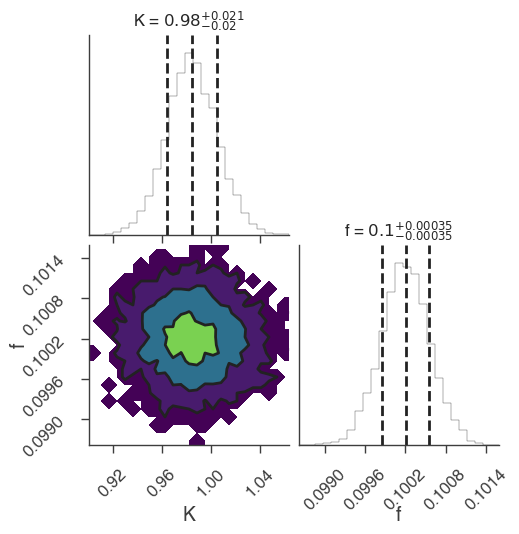

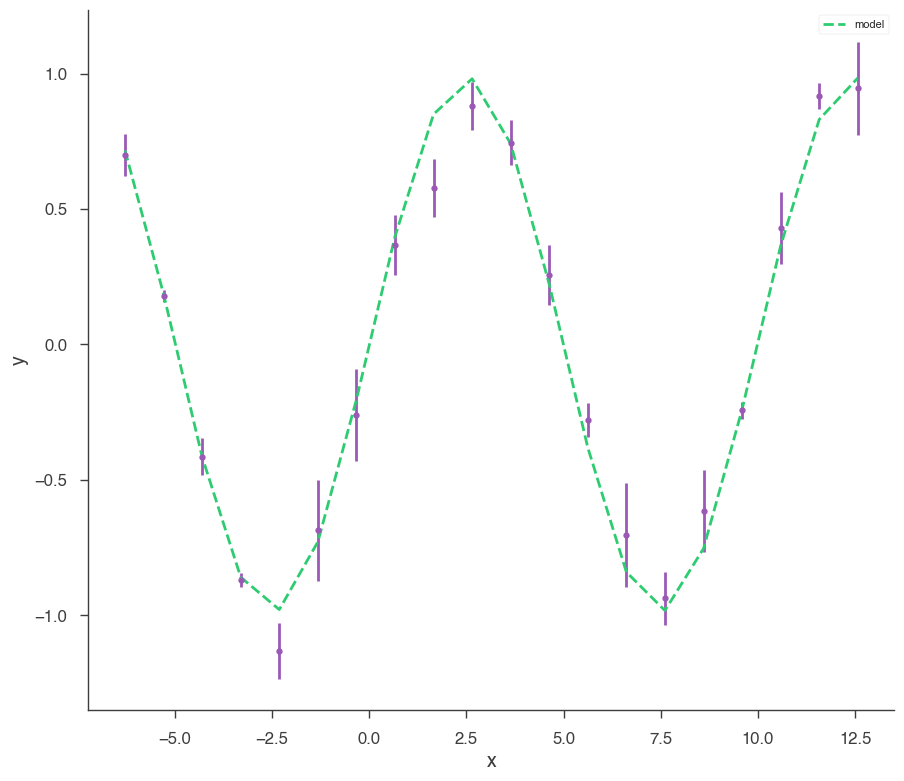

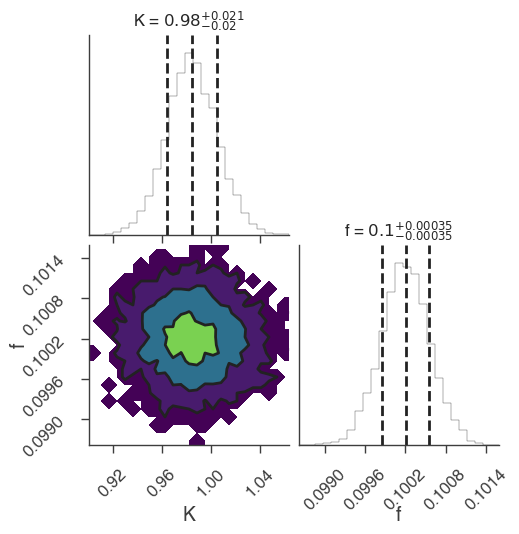

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

03:31:59 INFO      sampler set to zeus                                                     ]8;id=762308;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=715103;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   0%|          | 3/625 [00:00<00:22, 28.06it/s]

Sampling progress :   1%|          | 6/625 [00:00<00:21, 28.23it/s]

Sampling progress :   1%|▏         | 9/625 [00:00<00:22, 27.10it/s]

Sampling progress :   2%|▏         | 13/625 [00:00<00:20, 29.32it/s]

Sampling progress :   3%|▎         | 17/625 [00:00<00:19, 31.31it/s]

Sampling progress :   3%|▎         | 21/625 [00:00<00:19, 31.61it/s]

Sampling progress :   4%|▍         | 25/625 [00:00<00:18, 32.40it/s]

Sampling progress :   5%|▍         | 29/625 [00:00<00:18, 33.05it/s]

Sampling progress :   5%|▌         | 33/625 [00:01<00:17, 33.53it/s]

Sampling progress :   6%|▌         | 37/625 [00:01<00:18, 32.60it/s]

Sampling progress :   7%|▋         | 41/625 [00:01<00:17, 32.61it/s]

Sampling progress :   7%|▋         | 45/625 [00:01<00:17, 33.65it/s]

Sampling progress :   8%|▊         | 49/625 [00:01<00:16, 34.76it/s]

Sampling progress :   8%|▊         | 53/625 [00:01<00:16, 35.00it/s]

Sampling progress :   9%|▉         | 57/625 [00:01<00:16, 34.75it/s]

Sampling progress :  10%|▉         | 61/625 [00:01<00:16, 34.41it/s]

Sampling progress :  10%|█         | 65/625 [00:01<00:16, 33.94it/s]

Sampling progress :  11%|█         | 69/625 [00:02<00:16, 34.41it/s]

Sampling progress :  12%|█▏        | 73/625 [00:02<00:16, 33.89it/s]

Sampling progress :  12%|█▏        | 77/625 [00:02<00:16, 33.97it/s]

Sampling progress :  13%|█▎        | 81/625 [00:02<00:16, 33.90it/s]

Sampling progress :  14%|█▎        | 85/625 [00:02<00:16, 33.23it/s]

Sampling progress :  14%|█▍        | 89/625 [00:02<00:15, 33.58it/s]

Sampling progress :  15%|█▍        | 93/625 [00:02<00:15, 33.77it/s]

Sampling progress :  16%|█▌        | 97/625 [00:02<00:15, 34.17it/s]

Sampling progress :  16%|█▌        | 101/625 [00:03<00:15, 34.63it/s]

Sampling progress :  17%|█▋        | 105/625 [00:03<00:15, 34.27it/s]

Sampling progress :  17%|█▋        | 109/625 [00:03<00:15, 33.78it/s]

Sampling progress :  18%|█▊        | 113/625 [00:03<00:14, 34.42it/s]

Sampling progress :  19%|█▊        | 117/625 [00:03<00:14, 34.12it/s]

Sampling progress :  19%|█▉        | 121/625 [00:03<00:14, 33.79it/s]

Sampling progress :  20%|██        | 125/625 [00:03<00:14, 33.87it/s]

Sampling progress :  21%|██        | 129/625 [00:03<00:14, 34.03it/s]

Sampling progress :  21%|██▏       | 133/625 [00:03<00:14, 34.00it/s]

Sampling progress :  22%|██▏       | 137/625 [00:04<00:14, 34.46it/s]

Sampling progress :  23%|██▎       | 141/625 [00:04<00:14, 33.29it/s]

Sampling progress :  23%|██▎       | 145/625 [00:04<00:14, 33.95it/s]

Sampling progress :  24%|██▍       | 149/625 [00:04<00:14, 32.96it/s]

Sampling progress :  24%|██▍       | 153/625 [00:04<00:14, 33.14it/s]

Sampling progress :  25%|██▌       | 157/625 [00:04<00:13, 33.53it/s]

Sampling progress :  26%|██▌       | 161/625 [00:04<00:13, 33.82it/s]

Sampling progress :  26%|██▋       | 165/625 [00:04<00:13, 33.43it/s]

Sampling progress :  27%|██▋       | 169/625 [00:05<00:13, 32.83it/s]

Sampling progress :  28%|██▊       | 173/625 [00:05<00:13, 33.06it/s]

Sampling progress :  28%|██▊       | 177/625 [00:05<00:13, 33.58it/s]

Sampling progress :  29%|██▉       | 181/625 [00:05<00:13, 33.72it/s]

Sampling progress :  30%|██▉       | 185/625 [00:05<00:12, 33.94it/s]

Sampling progress :  30%|███       | 189/625 [00:05<00:12, 33.72it/s]

Sampling progress :  31%|███       | 193/625 [00:05<00:12, 33.82it/s]

Sampling progress :  32%|███▏      | 197/625 [00:05<00:13, 32.53it/s]

Sampling progress :  32%|███▏      | 201/625 [00:06<00:12, 33.67it/s]

Sampling progress :  33%|███▎      | 205/625 [00:06<00:12, 33.24it/s]

Sampling progress :  33%|███▎      | 209/625 [00:06<00:12, 33.29it/s]

Sampling progress :  34%|███▍      | 213/625 [00:06<00:12, 33.12it/s]

Sampling progress :  35%|███▍      | 217/625 [00:06<00:12, 33.06it/s]

Sampling progress :  35%|███▌      | 221/625 [00:06<00:12, 32.61it/s]

Sampling progress :  36%|███▌      | 225/625 [00:06<00:13, 30.53it/s]

Sampling progress :  37%|███▋      | 229/625 [00:06<00:13, 29.92it/s]

Sampling progress :  37%|███▋      | 233/625 [00:07<00:12, 31.45it/s]

Sampling progress :  38%|███▊      | 237/625 [00:07<00:12, 31.77it/s]

Sampling progress :  39%|███▊      | 241/625 [00:07<00:11, 32.71it/s]

Sampling progress :  39%|███▉      | 245/625 [00:07<00:11, 33.65it/s]

Sampling progress :  40%|███▉      | 249/625 [00:07<00:11, 33.33it/s]

Sampling progress :  40%|████      | 253/625 [00:07<00:11, 32.82it/s]

Sampling progress :  41%|████      | 257/625 [00:07<00:11, 32.17it/s]

Sampling progress :  42%|████▏     | 261/625 [00:07<00:10, 33.48it/s]

Sampling progress :  42%|████▏     | 265/625 [00:07<00:10, 34.13it/s]

Sampling progress :  43%|████▎     | 269/625 [00:08<00:10, 34.08it/s]

Sampling progress :  44%|████▎     | 273/625 [00:08<00:10, 34.45it/s]

Sampling progress :  44%|████▍     | 277/625 [00:08<00:10, 33.59it/s]

Sampling progress :  45%|████▍     | 281/625 [00:08<00:10, 33.66it/s]

Sampling progress :  46%|████▌     | 285/625 [00:08<00:09, 34.76it/s]

Sampling progress :  46%|████▌     | 289/625 [00:08<00:09, 34.77it/s]

Sampling progress :  47%|████▋     | 293/625 [00:08<00:09, 34.88it/s]

Sampling progress :  48%|████▊     | 297/625 [00:08<00:09, 33.98it/s]

Sampling progress :  48%|████▊     | 301/625 [00:09<00:09, 34.49it/s]

Sampling progress :  49%|████▉     | 305/625 [00:09<00:09, 33.65it/s]

Sampling progress :  49%|████▉     | 309/625 [00:09<00:09, 34.46it/s]

Sampling progress :  50%|█████     | 313/625 [00:09<00:09, 34.35it/s]

Sampling progress :  51%|█████     | 317/625 [00:09<00:08, 35.71it/s]

Sampling progress :  52%|█████▏    | 322/625 [00:09<00:08, 37.46it/s]

Sampling progress :  52%|█████▏    | 326/625 [00:09<00:08, 35.40it/s]

Sampling progress :  53%|█████▎    | 330/625 [00:09<00:08, 34.97it/s]

Sampling progress :  53%|█████▎    | 334/625 [00:09<00:08, 34.72it/s]

Sampling progress :  54%|█████▍    | 338/625 [00:10<00:08, 34.07it/s]

Sampling progress :  55%|█████▍    | 342/625 [00:10<00:08, 31.83it/s]

Sampling progress :  55%|█████▌    | 346/625 [00:10<00:08, 32.84it/s]

Sampling progress :  56%|█████▌    | 350/625 [00:10<00:08, 32.98it/s]

Sampling progress :  57%|█████▋    | 354/625 [00:10<00:08, 33.04it/s]

Sampling progress :  57%|█████▋    | 358/625 [00:10<00:08, 33.29it/s]

Sampling progress :  58%|█████▊    | 362/625 [00:10<00:08, 32.67it/s]

Sampling progress :  59%|█████▊    | 366/625 [00:10<00:07, 33.70it/s]

Sampling progress :  59%|█████▉    | 370/625 [00:11<00:07, 33.88it/s]

Sampling progress :  60%|█████▉    | 374/625 [00:11<00:07, 33.92it/s]

Sampling progress :  60%|██████    | 378/625 [00:11<00:07, 33.95it/s]

Sampling progress :  61%|██████    | 382/625 [00:11<00:06, 35.25it/s]

Sampling progress :  62%|██████▏   | 386/625 [00:11<00:06, 34.46it/s]

Sampling progress :  62%|██████▏   | 390/625 [00:11<00:06, 33.81it/s]

Sampling progress :  63%|██████▎   | 394/625 [00:11<00:06, 34.08it/s]

Sampling progress :  64%|██████▎   | 398/625 [00:11<00:06, 34.15it/s]

Sampling progress :  64%|██████▍   | 402/625 [00:11<00:06, 35.28it/s]

Sampling progress :  65%|██████▍   | 406/625 [00:12<00:06, 34.81it/s]

Sampling progress :  66%|██████▌   | 410/625 [00:12<00:06, 33.19it/s]

Sampling progress :  66%|██████▌   | 414/625 [00:12<00:06, 32.65it/s]

Sampling progress :  67%|██████▋   | 418/625 [00:12<00:06, 32.78it/s]

Sampling progress :  68%|██████▊   | 422/625 [00:12<00:06, 32.78it/s]

Sampling progress :  68%|██████▊   | 426/625 [00:12<00:05, 33.37it/s]

Sampling progress :  69%|██████▉   | 430/625 [00:12<00:05, 33.79it/s]

Sampling progress :  69%|██████▉   | 434/625 [00:12<00:05, 34.71it/s]

Sampling progress :  70%|███████   | 438/625 [00:13<00:05, 35.06it/s]

Sampling progress :  71%|███████   | 442/625 [00:13<00:05, 34.67it/s]

Sampling progress :  71%|███████▏  | 446/625 [00:13<00:05, 34.62it/s]

Sampling progress :  72%|███████▏  | 450/625 [00:13<00:05, 34.65it/s]

Sampling progress :  73%|███████▎  | 454/625 [00:13<00:04, 34.68it/s]

Sampling progress :  73%|███████▎  | 458/625 [00:13<00:04, 35.10it/s]

Sampling progress :  74%|███████▍  | 462/625 [00:13<00:04, 35.06it/s]

Sampling progress :  75%|███████▍  | 466/625 [00:13<00:04, 34.55it/s]

Sampling progress :  75%|███████▌  | 470/625 [00:13<00:04, 34.12it/s]

Sampling progress :  76%|███████▌  | 474/625 [00:14<00:04, 34.24it/s]

Sampling progress :  76%|███████▋  | 478/625 [00:14<00:04, 34.37it/s]

Sampling progress :  77%|███████▋  | 482/625 [00:14<00:04, 34.52it/s]

Sampling progress :  78%|███████▊  | 486/625 [00:14<00:03, 35.12it/s]

Sampling progress :  78%|███████▊  | 490/625 [00:14<00:03, 34.72it/s]

Sampling progress :  79%|███████▉  | 494/625 [00:14<00:03, 34.95it/s]

Sampling progress :  80%|███████▉  | 498/625 [00:14<00:03, 34.68it/s]

Sampling progress :  80%|████████  | 502/625 [00:14<00:03, 35.28it/s]

Sampling progress :  81%|████████  | 506/625 [00:14<00:03, 35.88it/s]

Sampling progress :  82%|████████▏ | 510/625 [00:15<00:03, 35.88it/s]

Sampling progress :  82%|████████▏ | 514/625 [00:15<00:03, 34.63it/s]

Sampling progress :  83%|████████▎ | 518/625 [00:15<00:03, 34.25it/s]

Sampling progress :  84%|████████▎ | 522/625 [00:15<00:03, 33.92it/s]

Sampling progress :  84%|████████▍ | 526/625 [00:15<00:02, 34.60it/s]

Sampling progress :  85%|████████▍ | 530/625 [00:15<00:02, 35.59it/s]

Sampling progress :  85%|████████▌ | 534/625 [00:15<00:02, 35.71it/s]

Sampling progress :  86%|████████▌ | 538/625 [00:15<00:02, 34.11it/s]

Sampling progress :  87%|████████▋ | 542/625 [00:16<00:02, 35.05it/s]

Sampling progress :  87%|████████▋ | 546/625 [00:16<00:02, 34.94it/s]

Sampling progress :  88%|████████▊ | 550/625 [00:16<00:02, 35.52it/s]

Sampling progress :  89%|████████▊ | 554/625 [00:16<00:02, 34.90it/s]

Sampling progress :  89%|████████▉ | 558/625 [00:16<00:01, 34.70it/s]

Sampling progress :  90%|████████▉ | 562/625 [00:16<00:01, 35.11it/s]

Sampling progress :  91%|█████████ | 566/625 [00:16<00:01, 34.12it/s]

Sampling progress :  91%|█████████ | 570/625 [00:16<00:01, 34.07it/s]

Sampling progress :  92%|█████████▏| 574/625 [00:16<00:01, 33.76it/s]

Sampling progress :  92%|█████████▏| 578/625 [00:17<00:01, 33.72it/s]

Sampling progress :  93%|█████████▎| 582/625 [00:17<00:01, 34.03it/s]

Sampling progress :  94%|█████████▍| 586/625 [00:17<00:01, 34.65it/s]

Sampling progress :  94%|█████████▍| 590/625 [00:17<00:01, 33.49it/s]

Sampling progress :  95%|█████████▌| 594/625 [00:17<00:00, 34.64it/s]

Sampling progress :  96%|█████████▌| 598/625 [00:17<00:00, 34.17it/s]

Sampling progress :  96%|█████████▋| 602/625 [00:17<00:00, 33.82it/s]

Sampling progress :  97%|█████████▋| 606/625 [00:17<00:00, 33.66it/s]

Sampling progress :  98%|█████████▊| 610/625 [00:18<00:00, 34.78it/s]

Sampling progress :  98%|█████████▊| 614/625 [00:18<00:00, 33.63it/s]

Sampling progress :  99%|█████████▉| 618/625 [00:18<00:00, 33.66it/s]

Sampling progress : 100%|█████████▉| 622/625 [00:18<00:00, 34.35it/s]

Sampling progress : 100%|██████████| 625/625 [00:18<00:00, 33.85it/s]

03:32:18 INFO      fit restored to maximum of posterior                                         ]8;id=701099;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=127334;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=365212;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=321345;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 30


Scale Factor: 1.146271


Mean Integrated Autocorrelation Time: 3.25


Effective Sample Size: 3847.67


Number of Log Probability Evaluations: 65934


Effective Samples per Log Probability Evaluation: 0.058356


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.85 -0.22 +0.21) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0019 -0.004 +0.0035) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.249071
total,-9.249071


Values of statistical measures:

,statistical measures
AIC,23.204024
BIC,24.489607
DIC,22.604072
PDIC,2.052186


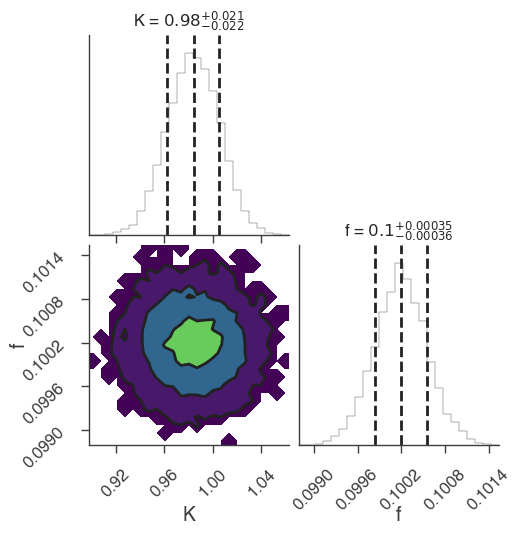

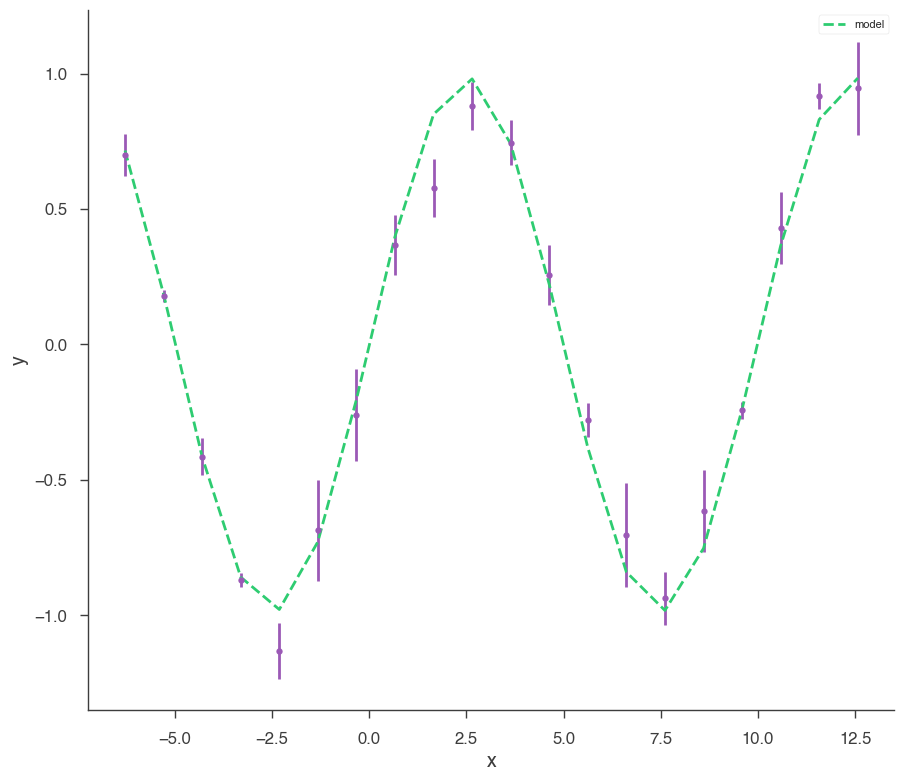

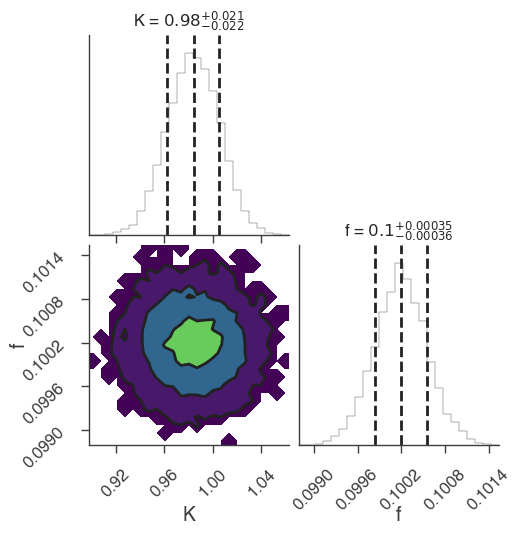

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

03:32:19 INFO      sampler set to ultranest                                                ]8;id=96260;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=360231;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-9  


[ultranest] Likelihood function evaluations: 9864


[ultranest]   logZ = -18.43 +- 0.1007


[ultranest] Effective samples strategy satisfied (ESS = 975.7, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.04 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.10 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


03:32:31 INFO      fit restored to maximum of posterior                                         ]8;id=984208;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=31559;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=121910;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=358747;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.85 -0.23 +0.20) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0017 -0.0033 +0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.251056
total,-9.251056


Values of statistical measures:

,statistical measures
AIC,23.207994
BIC,24.493576
DIC,22.612636
PDIC,2.054632
log(Z),-8.017130


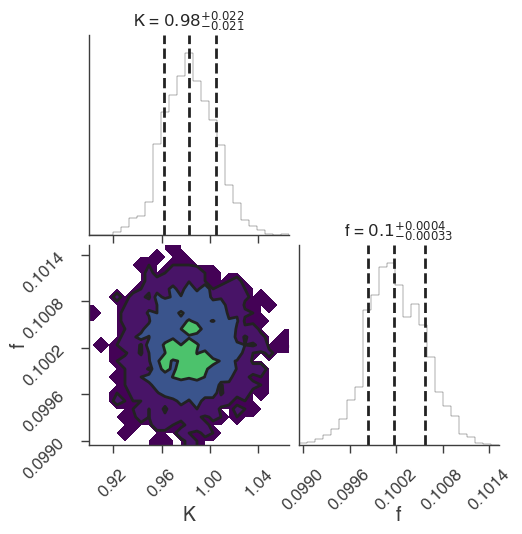

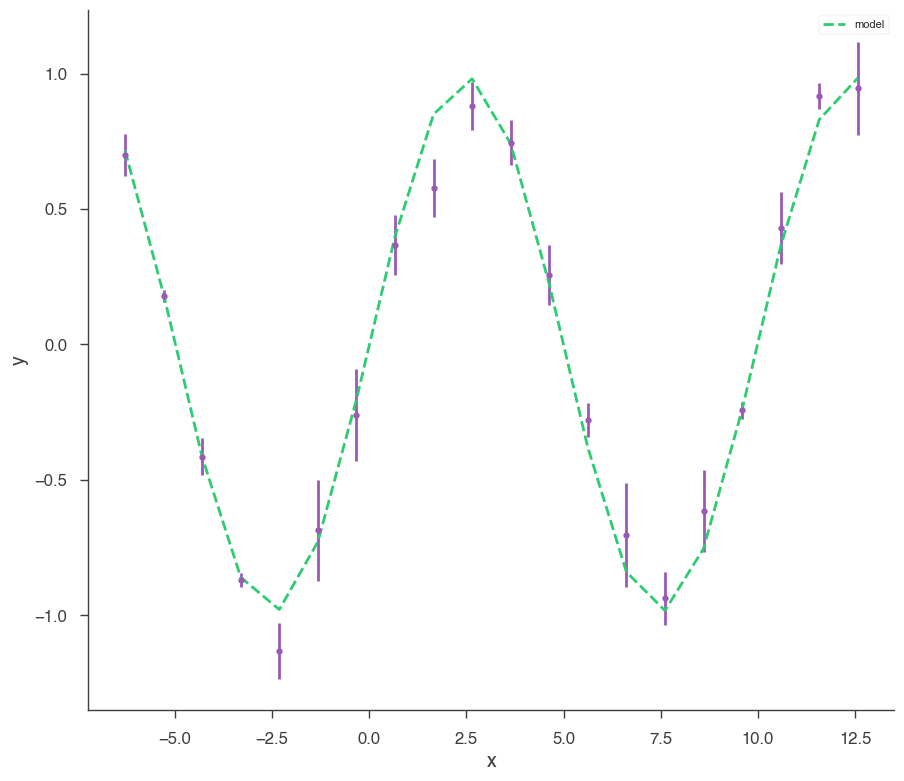

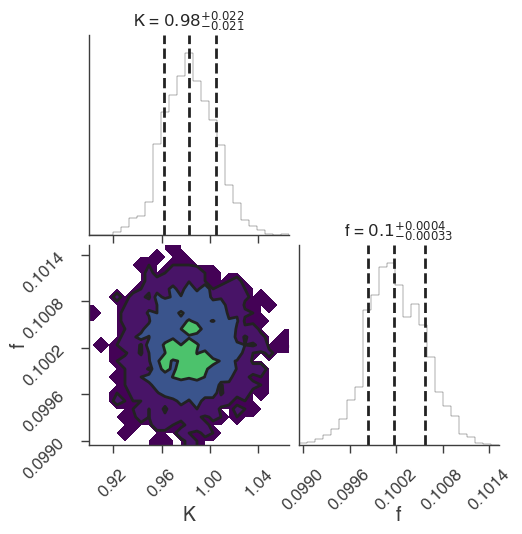

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()